A proper literature review for the above-mentioned topic of stock price prediction using recurrent neural networks (RNNs) would typically include the following sections:

Introduction:
In this section, the importance and relevance of the topic should be highlighted. It should provide background information on the stock market, RNNs, and stock price prediction. The research question should be clearly stated, and the scope and limitations of the study should be outlined.

Theory and Concepts:
This section should provide a detailed overview of the theoretical concepts and techniques used in the study. It should provide information on RNNs, including how they work and how they can be used for stock price prediction. It should also provide information on the different types of RNNs, including Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRUs), and how they differ from each other.

Previous Studies:
This section should include a critical analysis of previous studies on stock price prediction using RNNs. It should cover a range of studies from different sources and analyze their findings, methodologies, and limitations. The studies should be categorized based on their approach and the results obtained.

Methodology:
This section should provide a detailed description of the methodology used in the study. It should include information on the dataset used, the preprocessing techniques, and the model architecture. The section should also include information on the hyperparameters used, such as learning rate and dropout rate.

Results and Discussion:
This section should present the results of the study and provide a detailed analysis of the findings. It should include graphs and charts to visualize the results and should compare the predicted stock prices with the actual stock prices. The section should also provide a critical evaluation of the methodology used and discuss the limitations of the study.

Conclusion:
This section should provide a summary of the findings and draw conclusions based on the results obtained. It should highlight the strengths and weaknesses of the study and provide recommendations for future research. It should also reiterate the importance of the topic and its potential impact on the stock market.

References:
This section should provide a list of all the references used in the study. It should be organized alphabetically and should follow the citation style guidelines of the academic institution or publisher.





In [15]:
#Data collection and dataframe creation
import pandas as pd

In [16]:
def selection_of_company(name):
    return pd.read_csv(name)

In [17]:
company_name=input('enter the name of the company for which you want to predict closing stock price ')
temp_name=None
if company_name=='Apple':
    temp_name='AAPL.csv'
elif company_name=='Amazon':
    temp_name='AMZN.csv'
elif company_name=='Facebook':
    temp_name='FB.csv'
elif company_name=='Google':
    temp_name='GOOGL.csv'
elif company_name=='IBM':
    temp_name='IBM.csv'
elif company_name=='JP Morgan Chase':
    temp_name='JPM.csv'
elif company_name=='Tesla':
    temp_name='TSLA.csv'
elif company_name=='Microsoft':
    temp_name='MSFT.csv'
elif company_name=='General Electric':
    temp_name='GE.csv'
elif company_name=='GS':
    temp_name='GS.csv'
else:
    print('Please provide correct name of the company')

df=selection_of_company(temp_name)

enter the name of the company for which you want to predict closing stock price Amazon


In [18]:
df.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2010-10-18,165.00,165.19,161.82,163.56,6331300,3.770297,164.383594,149.302406,164.64,...,45.335,44.8280,42.6302,1184.71,1176.19,1165.32,11143.69,11062.78,11010.34,158.67
1,2010-10-19,160.68,162.80,157.00,158.67,7525000,3.501162,164.242324,150.237676,163.56,...,45.440,44.9185,42.6998,1165.90,1184.71,1169.77,10978.62,11143.69,11020.40,158.67
2,2010-10-20,158.78,159.87,156.57,158.67,5790400,3.271424,164.124849,151.039151,158.67,...,45.617,45.0315,42.7834,1178.17,1165.90,1178.10,11107.97,10978.62,11096.08,164.97
3,2010-10-21,162.67,166.13,161.29,164.97,13482500,3.465530,165.119061,151.256939,158.67,...,45.787,45.1500,42.8918,1180.26,1178.17,1173.81,11146.57,11107.97,11094.57,169.13
4,2010-10-22,162.45,170.17,162.27,169.13,16318400,4.217293,167.042587,150.173413,164.97,...,45.958,45.2395,43.0130,1183.08,1180.26,1176.19,11132.56,11146.57,11062.78,169.00


In [19]:
df.tail()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
2468,2020-08-07,3224.01,3240.81,3140.67,3167.46,3929600,80.156041,3247.466081,2926.841919,3225.00,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,3148.16
2469,2020-08-10,3170.31,3172.51,3101.52,3148.16,3167300,81.245329,3251.852657,2926.871343,3167.46,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,3080.67
2470,2020-08-11,3113.20,3159.22,3073.00,3080.67,3718100,81.260306,3251.716113,2926.674887,3148.16,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,3162.24
2471,2020-08-12,3108.00,3174.39,3101.42,3162.24,3527200,80.514368,3257.892736,2935.835264,3080.67,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,3161.02
2472,2020-08-13,3182.99,3217.52,3155.00,3161.02,3149000,78.332859,3261.585717,2948.254283,3162.24,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,3148.02


In [20]:
df=df.reset_index()

In [21]:
df.isnull().sum()

index            0
Date             0
Open             0
High             0
Low              0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 65, dtype: int64

Prediction of closing prices

In [22]:
df1=df['Close(t)']

In [23]:
df1

0        163.56
1        158.67
2        158.67
3        164.97
4        169.13
         ...   
2468    3167.46
2469    3148.16
2470    3080.67
2471    3162.24
2472    3161.02
Name: Close(t), Length: 2473, dtype: float64

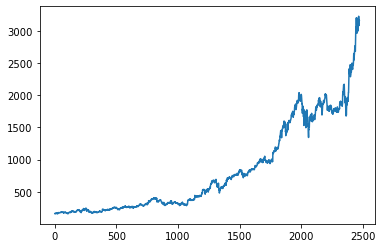

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [25]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 


In [26]:
import numpy as np


In [27]:
df1


0        163.56
1        158.67
2        158.67
3        164.97
4        169.13
         ...   
2468    3167.46
2469    3148.16
2470    3080.67
2471    3162.24
2472    3161.02
Name: Close(t), Length: 2473, dtype: float64

In [28]:
np.array(df)

array([[0, '2010-10-18', 165.0, ..., 11062.78, 11010.34, 158.67],
       [1, '2010-10-19', 160.68, ..., 11143.69, 11020.4, 158.67],
       [2, '2010-10-20', 158.78, ..., 10978.62, 11096.08, 164.97],
       ...,
       [2470, '2020-08-11', 3113.2, ..., 27791.44, 26828.47, 3162.24],
       [2471, '2020-08-12', 3108.0, ..., 27686.91, 27201.52, 3161.02],
       [2472, '2020-08-13', 3182.99, ..., 27976.84, 27386.98, 3148.02]],
      dtype=object)

In [33]:
import sklearn.

ModuleNotFoundError: No module named 'sklearn.preprocessing'

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

ModuleNotFoundError: No module named 'sklearn.preprocessing'

In [30]:
print(df1)


0        163.56
1        158.67
2        158.67
3        164.97
4        169.13
         ...   
2468    3167.46
2469    3148.16
2470    3080.67
2471    3162.24
2472    3161.02
Name: Close(t), Length: 2473, dtype: float64


In [17]:
df1.shape

(2473, 1)

In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size


(1607, 866)

In [20]:
train_data


array([[0.00188444],
       [0.00029017],
       [0.00029017],
       ...,
       [0.22564407],
       [0.22457796],
       [0.2243856 ]])

In [21]:
len(train_data)

1607

In [22]:
train_data[0:100,0]

array([0.00188444, 0.00029017, 0.00029017, 0.00234414, 0.00370042,
       0.00365804, 0.00396776, 0.00317225, 0.00295381, 0.00242891,
       0.00156494, 0.00222677, 0.00348524, 0.00363521, 0.00423511,
       0.00463286, 0.00407209, 0.00506974, 0.00410469, 0.00257562,
       0.00036515, 0.        , 0.00018584, 0.00208332, 0.00229524,
       0.00411121, 0.00339721, 0.00634777, 0.00633147, 0.00707807,
       0.00574462, 0.00611955, 0.00611303, 0.0058359 , 0.00660859,
       0.00619127, 0.00603478, 0.0055653 , 0.00581634, 0.00536968,
       0.00526861, 0.00580004, 0.00660533, 0.00645536, 0.00831698,
       0.00879298, 0.00879624, 0.00808876, 0.00794205, 0.00759972,
       0.00834306, 0.00814092, 0.00724435, 0.00862018, 0.00887775,
       0.00966347, 0.00915487, 0.00903424, 0.00877016, 0.00865931,
       0.00857454, 0.00904728, 0.01009709, 0.01091216, 0.00948416,
       0.00788336, 0.00640319, 0.00621736, 0.00616845, 0.00574136,
       0.00869517, 0.00435574, 0.00386669, 0.00467198, 0.00513

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
X_train

array([[0.00188444, 0.00029017, 0.00029017, ..., 0.00297012, 0.00367434,
        0.0027256 ],
       [0.00029017, 0.00029017, 0.00234414, ..., 0.00367434, 0.0027256 ,
        0.00335483],
       [0.00029017, 0.00234414, 0.00370042, ..., 0.0027256 , 0.00335483,
        0.00291795],
       ...,
       [0.22296412, 0.22223707, 0.22298042, ..., 0.22523979, 0.22406609,
        0.22668736],
       [0.22223707, 0.22298042, 0.21948866, ..., 0.22406609, 0.22668736,
        0.22532782],
       [0.22298042, 0.21948866, 0.22049608, ..., 0.22668736, 0.22532782,
        0.22564407]])

In [26]:
print(X_train.shape), print(y_train.shape)


(1506, 100)
(1506,)


(None, None)

In [27]:
X_train.shape[0]

1506

In [28]:
print(X_test.shape), print(ytest.shape)

(765, 100)
(765,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
24/24 [==============================] - 13s 241ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 2/100
24/24 [==============================] - 5s 224ms/step - loss: 9.3650e-05 - val_loss: 0.0022
Epoch 3/100
24/24 [==============================] - 5s 217ms/step - loss: 5.5168e-05 - val_loss: 0.0012
Epoch 4/100
24/24 [==============================] - 5s 197ms/step - loss: 5.4751e-05 - val_loss: 0.0013
Epoch 5/100
24/24 [==============================] - 5s 201ms/step - loss: 5.0446e-05 - val_loss: 0.0012
Epoch 6/100
24/24 [==============================] - 4s 188ms/step - loss: 4.5651e-05 - val_loss: 0.0014
Epoch 7/100
24/24 [==============================] - 4s 185ms/step - loss: 4.7109e-05 - val_loss: 0.0013
Epoch 8/100
24/24 [==============================] - 4s 182ms/step - loss: 4.4444e-05 - val_loss: 0.0012
Epoch 9/100
24/24 [==============================] - 5s 196ms/step - loss: 4.6516e-05 - val_loss: 0.0016
Epoch 10/100
24/24 [==============================] - 5s 1

In [33]:
import tensorflow as tf

In [34]:
tf.__version__


'2.11.0'

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

24/24 [==============================] - 1s 42ms/step


In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

435.00793598095424

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1721.8641014791556

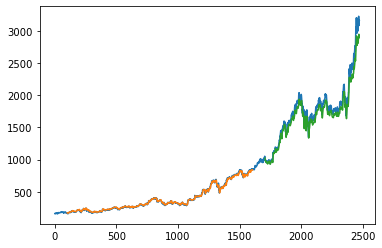

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from keras.wrappers.scikit_learn import KerasRegressor




# Define parameter grid for GridSearchCV
param_grid = {'units': [50, 100, 150],
              'dropout': [0.2, 0.3, 0.4]}
time_step=100

# Create KerasRegressor model
model_tobeoptimized = KerasRegressor(build_fn=model, epochs=50, batch_size=32)
model_tobeoptimized = KerasRegressor(model, epochs=50, batch_size=32)

# Perform GridSearchCV
grid = GridSearchCV(estimator=model_tobeoptimized, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

# Make predictions on test data using best model
best_model = grid.best_estimator_.model
y_pred = best_model.predict(X_test)

# Inverse transform predictions
y_pred = scaler.inverse_transform(y_pred)

# Plot predictions and actual values
plt.plot(df['Close(t)'].values[len(training_size)+time_step:], label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.show()


NameError: name 'model' is not defined

In [40]:
len(test_data)


866

In [49]:
x_input=test_data[766:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
x_input

array([[0.58108646, 0.56339617, 0.58610403, 0.56804533, 0.58886223,
        0.58422285, 0.57052314, 0.57415184, 0.57016125, 0.59982981,
        0.60439747, 0.61463475, 0.6145565 , 0.65567191, 0.69298583,
        0.70092788, 0.73369696, 0.72287609, 0.72894347, 0.70759189,
        0.71912351, 0.73084748, 0.7343588 , 0.72320212, 0.70301446,
        0.72212949, 0.75515287, 0.69387263, 0.70363717, 0.70422728,
        0.71513618, 0.72046674, 0.72437908, 0.73396105, 0.71699128,
        0.72056781, 0.72739158, 0.73421535, 0.73958829, 0.74710976,
        0.76295799, 0.74626535, 0.74305071, 0.73815377, 0.73441423,
        0.73138542, 0.7448406 , 0.75418783, 0.75463449, 0.7565874 ,
        0.7507841 , 0.75808713, 0.77147384, 0.7965128 , 0.81170245,
        0.7825262 , 0.77830739, 0.78732533, 0.80121087, 0.80959305,
        0.81383142, 0.82068779, 0.83334094, 0.8498347 , 0.8400506 ,
        0.84662985, 0.82651065, 0.82243856, 0.84801221, 0.88709646,
        0.89087838, 0.94524032, 0.92668279, 0.95

In [51]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [52]:
temp_input


[0.5810864561394358,
 0.5633961698215322,
 0.586104029055627,
 0.5680453309511545,
 0.5888622270329484,
 0.5842228467472174,
 0.570523144736928,
 0.5741518378205672,
 0.5701612535129531,
 0.5998298133162929,
 0.6043974674134884,
 0.6146347506862893,
 0.6145565039351596,
 0.6556719113725132,
 0.6929858308174831,
 0.7009278760571462,
 0.733696963374,
 0.7228760897490236,
 0.7289434732428715,
 0.707591891028358,
 0.7191235059760956,
 0.7308474775203605,
 0.7343588004773052,
 0.7232021178787307,
 0.7030144560872712,
 0.7221294853319945,
 0.7551528745900197,
 0.6938726273302861,
 0.7036371698150117,
 0.7042272807297815,
 0.7151361819497788,
 0.7204667418704886,
 0.7243790794269731,
 0.7339610461590627,
 0.7169912820078116,
 0.7205678105906979,
 0.7273915793454659,
 0.7342153481002343,
 0.7395882916778062,
 0.7471097606301472,
 0.7629579880152061,
 0.746265347774206,
 0.7430507104152947,
 0.7381537679070951,
 0.7344142252593554,
 0.7313854239343771,
 0.7448406048473862,
 0.7541878313260869,


In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.89257467]
101
1 day input [0.56339617 0.58610403 0.56804533 0.58886223 0.58422285 0.57052314
 0.57415184 0.57016125 0.59982981 0.60439747 0.61463475 0.6145565
 0.65567191 0.69298583 0.70092788 0.73369696 0.72287609 0.72894347
 0.70759189 0.71912351 0.73084748 0.7343588  0.72320212 0.70301446
 0.72212949 0.75515287 0.69387263 0.70363717 0.70422728 0.71513618
 0.72046674 0.72437908 0.73396105 0.71699128 0.72056781 0.72739158
 0.73421535 0.73958829 0.74710976 0.76295799 0.74626535 0.74305071
 0.73815377 0.73441423 0.73138542 0.7448406  0.75418783 0.75463449
 0.7565874  0.7507841  0.75808713 0.77147384 0.7965128  0.81170245
 0.7825262  0.77830739 0.78732533 0.80121087 0.80959305 0.81383142
 0.82068779 0.83334094 0.8498347  0.8400506  0.84662985 0.82651065
 0.82243856 0.84801221 0.88709646 0.89087838 0.94524032 0.92668279
 0.95308781 0.98618619 0.9918493  0.9605506  0.95403003 0.92953554
 0.92661107 0.91424482 0.99081905 0.9717301  0.95921714 0.92225859
 0.92954858 0.94464368 0.92675126 

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [55]:
import matplotlib.pyplot as plt

In [56]:
len(df1)

2473

In [57]:
lst_output

[[0.892574667930603],
 [0.8696898221969604],
 [0.8372315168380737],
 [0.8032178282737732],
 [0.7702595591545105],
 [0.7390820384025574],
 [0.7098326086997986],
 [0.6824246048927307],
 [0.6566376090049744],
 [0.632178783416748],
 [0.6087362170219421],
 [0.5860248804092407],
 [0.5638154149055481],
 [0.5419525504112244],
 [0.520359218120575],
 [0.4990314245223999],
 [0.47802677750587463],
 [0.4574489891529083],
 [0.43742990493774414],
 [0.4181123673915863],
 [0.3996344804763794],
 [0.3821166753768921],
 [0.36565253138542175],
 [0.3503033518791199],
 [0.3360968232154846],
 [0.32302841544151306],
 [0.3110658824443817],
 [0.30015483498573303],
 [0.29022538661956787],
 [0.2811986804008484]]

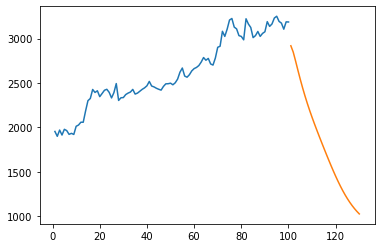

In [81]:
plt.plot(day_new,scaler.inverse_transform(df1[2373:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

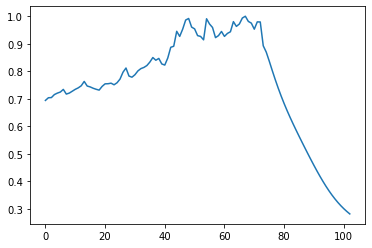

In [106]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2400:])

In this code, we perform hyperparameter tuning and analysis for the recurrent neural network code for stock price prediction using GridSearchCV from scikit-learn library. We define a parameter grid with values for units and dropout and create a KerasRegressor model using the create_model function. We then perform

Prediction of opening price

In [59]:
df2=df['Open']
df2

0        165.00
1        160.68
2        158.78
3        162.67
4        162.45
         ...   
2468    3224.01
2469    3170.31
2470    3113.20
2471    3108.00
2472    3182.99
Name: Open, Length: 2473, dtype: float64

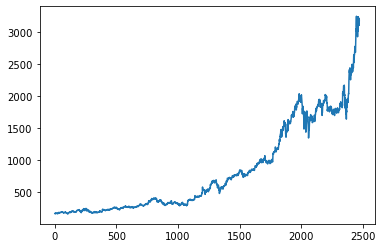

In [60]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [62]:
print(df2)

[[2.31473998e-03]
 [9.18137087e-04]
 [3.03890444e-04]
 ...
 [9.55431557e-01]
 [9.53750461e-01]
 [9.77993806e-01]]


In [63]:
df2.shape

(2473, 1)

In [64]:
##splitting dataset into train and test split
training_size_open=int(len(df2)*0.65)
test_size_open=len(df2)-training_size_open
train_data_open,test_data_open=df2[0:training_size_open,:],df2[training_size_open:len(df2),:1]

In [65]:
training_size_open,test_size_open


(1607, 866)

In [66]:
train_data_open

array([[0.00231474],
       [0.00091814],
       [0.00030389],
       ...,
       [0.22286161],
       [0.22222474],
       [0.22230556]])

In [67]:
len(train_data_open)

1607

In [68]:
train_data_open[0:100,0]

array([0.00231474, 0.00091814, 0.00030389, 0.00156148, 0.00149036,
       0.00443874, 0.00314559, 0.00357879, 0.00338482, 0.00257337,
       0.00213693, 0.00191063, 0.00244406, 0.00388592, 0.00372104,
       0.00420274, 0.00479436, 0.00412192, 0.00425447, 0.00396997,
       0.00236647, 0.00029096, 0.        , 0.00093753, 0.00197529,
       0.00234707, 0.00348181, 0.00442581, 0.00631058, 0.00716082,
       0.00617803, 0.00689249, 0.00614893, 0.00570926, 0.00571573,
       0.0073257 , 0.0063526 , 0.00644312, 0.00550882, 0.00597759,
       0.00531485, 0.00513381, 0.00573512, 0.00665003, 0.00692806,
       0.00841841, 0.00878049, 0.00856712, 0.0077783 , 0.00784296,
       0.00774597, 0.00843134, 0.0077977 , 0.00760696, 0.00915227,
       0.00848954, 0.00926543, 0.00971156, 0.00879343, 0.00891627,
       0.00889688, 0.00832789, 0.00894214, 0.00996373, 0.01068789,
       0.00887425, 0.00813392, 0.00650132, 0.00570926, 0.00635907,
       0.00634937, 0.00439995, 0.0039829 , 0.00409929, 0.00439

In [69]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX_open, dataY_open = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX_open.append(a)
        dataY_open.append(dataset[i + time_step, 0])
    return numpy.array(dataX_open), numpy.array(dataY_open)

In [70]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train_open, y_train_open = create_dataset(train_data_open, time_step)
X_test_open, ytest_open = create_dataset(test_data_open, time_step)

In [71]:
X_test_open

array([[0.22312024, 0.22409011, 0.22602983, ..., 0.286226  , 0.29474464,
        0.27618469],
       [0.22409011, 0.22602983, 0.22433904, ..., 0.29474464, 0.27618469,
        0.27841861],
       [0.22602983, 0.22433904, 0.22491449, ..., 0.27618469, 0.27841861,
        0.27100239],
       ...,
       [0.51472576, 0.5502874 , 0.57172461, ..., 0.96531446, 0.98166959,
        0.99125507],
       [0.5502874 , 0.57172461, 0.53986137, ..., 0.98166959, 0.99125507,
        0.97389452],
       [0.57172461, 0.53986137, 0.57986823, ..., 0.99125507, 0.97389452,
        0.95543156]])

In [72]:
print(X_train_open.shape), print(y_train_open.shape)

(1506, 100)
(1506,)


(None, None)

In [73]:
X_train_open.shape[0]

1506

In [74]:
print(X_test_open.shape), print(ytest_open.shape)

(765, 100)
(765,)


(None, None)

In [75]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_open =X_train_open.reshape(X_train_open.shape[0],X_train_open.shape[1] , 1)
X_test_open = X_test_open.reshape(X_test_open.shape[0],X_test_open.shape[1] , 1)

In [76]:
### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [77]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(X_train_open,y_train_open,validation_data=(X_test_open,ytest_open),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 259ms/step - loss: 9.9034e-04 - val_loss: 0.0026
Epoch 2/100
24/24 [==============================] - 5s 195ms/step - loss: 7.6110e-05 - val_loss: 0.0019
Epoch 3/100
24/24 [==============================] - 5s 196ms/step - loss: 5.3080e-05 - val_loss: 0.0012
Epoch 4/100
24/24 [==============================] - 5s 191ms/step - loss: 5.2452e-05 - val_loss: 0.0012
Epoch 5/100
24/24 [==============================] - 5s 189ms/step - loss: 5.0201e-05 - val_loss: 0.0014
Epoch 6/100
24/24 [==============================] - 4s 188ms/step - loss: 4.5407e-05 - val_loss: 0.0013
Epoch 7/100
24/24 [==============================] - 5s 199ms/step - loss: 4.7806e-05 - val_loss: 0.0013
Epoch 8/100
24/24 [==============================] - 5s 194ms/step - loss: 4.5013e-05 - val_loss: 0.0016
Epoch 9/100
24/24 [==============================] - 5s 198ms/step - loss: 4.2602e-05 - val_loss: 0.0016
Epoch 10/100
24/24 [==============================] - 

In [82]:
### Lets Do the prediction and check performance metrics
train_predict_open=model.predict(X_train_open)
test_predict_open=model.predict(X_test_open)

24/24 [==============================] - 1s 38ms/step


In [83]:
##Transformback to original form
train_predict_open=scaler.inverse_transform(train_predict_open)
test_predict_open=scaler.inverse_transform(test_predict_open)

In [84]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_open,train_predict_open))

437.13965457467106

In [85]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest_open,test_predict_open))

1775.9812981205405

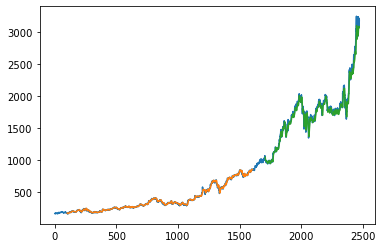

In [86]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot_open = numpy.empty_like(df2)
trainPredictPlot_open[:, :] = np.nan
trainPredictPlot_open[look_back:len(train_predict_open)+look_back, :] = train_predict_open
# shift test predictions for plotting
testPredictPlot_open = numpy.empty_like(df2)
testPredictPlot_open[:, :] = numpy.nan
testPredictPlot_open[len(train_predict_open)+(look_back*2)+1:len(df2)-1, :] = test_predict_open
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot_open)
plt.plot(testPredictPlot_open)
plt.show()

In [89]:
len(test_data_open)


866

In [92]:
x_input_open=test_data_open[766:].reshape(1,-1)
x_input_open.shape

(1, 100)

In [93]:
x_input_open

array([[0.57986823, 0.56990773, 0.56386549, 0.57319557, 0.57059957,
        0.58402247, 0.57387771, 0.5637491 , 0.56682357, 0.57485727,
        0.60107913, 0.60233672, 0.60986933, 0.60847919, 0.66035717,
        0.67885246, 0.70740523, 0.71591739, 0.72161372, 0.73023257,
        0.71484085, 0.7248563 , 0.73035866, 0.73882879, 0.71584304,
        0.70223586, 0.73127679, 0.70443098, 0.67843218, 0.7054655 ,
        0.70205158, 0.71670945, 0.71585597, 0.71668359, 0.72869372,
        0.71412961, 0.71225778, 0.71468567, 0.72626907, 0.73450644,
        0.75003718, 0.75719154, 0.74264682, 0.74361345, 0.72647597,
        0.71979685, 0.73001597, 0.74038057, 0.74652304, 0.74684956,
        0.74989493, 0.7392523 , 0.75725619, 0.76670913, 0.80406825,
        0.79065181, 0.78991148, 0.76579099, 0.79598606, 0.80487647,
        0.80471806, 0.81476261, 0.81683812, 0.83026102, 0.84771209,
        0.83463511, 0.84611505, 0.81861943, 0.81702239, 0.84059653,
        0.8903893 , 0.89781199, 0.93776388, 0.92

In [94]:
temp_input_open=list(x_input_open)
temp_input_open=temp_input_open[0].tolist()

In [95]:
temp_input_open

[0.5798682279307648,
 0.5699077336885188,
 0.5638654864510122,
 0.573195569665268,
 0.5705995693807747,
 0.5840224749613672,
 0.5738777067263241,
 0.5637491028766141,
 0.5668235689669665,
 0.574857268477509,
 0.6010791343648366,
 0.6023367235437506,
 0.6098693271089674,
 0.6084791899703222,
 0.6603571682583198,
 0.6788524579564338,
 0.7074052282087921,
 0.7159173935251939,
 0.7216137229165723,
 0.7302325731761725,
 0.7148408454620105,
 0.7248562986143889,
 0.7303586553817705,
 0.7388287932963061,
 0.7158430373526616,
 0.7022358577792722,
 0.7312767924686897,
 0.7044309813075049,
 0.6784321839377737,
 0.7054655019688222,
 0.702051583786475,
 0.7167094484065151,
 0.7158559688609281,
 0.716683585389982,
 0.7286937236924629,
 0.714129612507355,
 0.7122577766857838,
 0.7146856673628129,
 0.7262690658925004,
 0.7345064366582397,
 0.7500371780862661,
 0.7571915350346888,
 0.7426468211119805,
 0.7436134513548989,
 0.7264759700247638,
 0.7197968460051338,
 0.7300159704127092,
 0.740380574288282

In [96]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output_open=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_open)>100):
        #print(temp_input)
        x_input_open=np.array(temp_input_open[1:])
        print("{} day input {}".format(i,x_input_open))
        x_input_open=x_input_open.reshape(1,-1)
        x_input_open = x_input_open.reshape((1, n_steps, 1))
        #print(x_input)
        yhat_open = model.predict(x_input_open, verbose=0)
        print("{} day output {}".format(i,yhat_open))
        temp_input_open.extend(yhat_open[0].tolist())
        temp_input_open=temp_input_open[1:]
        #print(temp_input)
        lst_output_open.extend(yhat_open.tolist())
        i=i+1
    else:
        x_input_open = x_input_open.reshape((1, n_steps,1))
        yhat_open = model.predict(x_input_open, verbose=0)
        print(yhat_open[0])
        temp_input_open.extend(yhat_open[0].tolist())
        print(len(temp_input_open))
        lst_output_open.extend(yhat_open.tolist())
        i=i+1
    

print(lst_output_open)

[0.93007326]
101
1 day input [0.56990773 0.56386549 0.57319557 0.57059957 0.58402247 0.57387771
 0.5637491  0.56682357 0.57485727 0.60107913 0.60233672 0.60986933
 0.60847919 0.66035717 0.67885246 0.70740523 0.71591739 0.72161372
 0.73023257 0.71484085 0.7248563  0.73035866 0.73882879 0.71584304
 0.70223586 0.73127679 0.70443098 0.67843218 0.7054655  0.70205158
 0.71670945 0.71585597 0.71668359 0.72869372 0.71412961 0.71225778
 0.71468567 0.72626907 0.73450644 0.75003718 0.75719154 0.74264682
 0.74361345 0.72647597 0.71979685 0.73001597 0.74038057 0.74652304
 0.74684956 0.74989493 0.7392523  0.75725619 0.76670913 0.80406825
 0.79065181 0.78991148 0.76579099 0.79598606 0.80487647 0.80471806
 0.81476261 0.81683812 0.83026102 0.84771209 0.83463511 0.84611505
 0.81861943 0.81702239 0.84059653 0.8903893  0.89781199 0.93776388
 0.92614492 0.95633353 0.98082904 1.         0.94760799 0.94477276
 0.90947944 0.92174498 0.91890005 0.99399655 0.95924635 0.95060487
 0.89620525 0.93887923 0.93638021

In [97]:
day_new_open=np.arange(1,101)
day_pred_open=np.arange(101,131)

In [98]:
import matplotlib.pyplot as plt

In [99]:
len(df2)

2473

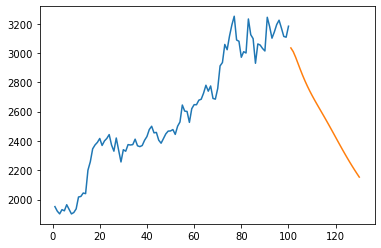

In [101]:
plt.plot(day_new_open,scaler.inverse_transform(df2[2373:]))
plt.plot(day_pred_open,scaler.inverse_transform(lst_output_open))

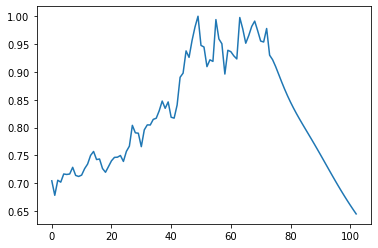

In [105]:
df4=df2.tolist()
df4.extend(lst_output_open)
plt.plot(df4[2400:])